In [2]:
# Use PCA and KMeans clustering
# Human Activity Recognition w/Smartphone dataset

import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
%matplotlib inline

In [3]:
np.random.seed(42)

In [4]:
data = pd.read_csv('/Users/vb/Desktop/dataset/activityrecognition/train.csv')

In [5]:
data.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


In [6]:
data.sample(10)

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
3031,8686,WALKING_DOWNSTAIRS,0.138,-0.0247,-0.1090,0.0488,-0.0965,-0.3860,-0.0405,-0.2140,...,0.0113,-0.3290,-0.7130,0.8280,-0.629,-0.831,-0.9420,-0.844,0.19500,0.066900
2194,6264,STANDING,0.275,-0.0187,-0.1070,-0.9980,-0.9830,-0.9720,-0.9980,-0.9810,...,0.1980,-0.4800,-0.8140,0.1810,-0.444,-0.346,0.4630,-0.783,0.24700,-0.000372
2031,5768,LAYING,0.273,-0.0156,-0.1110,-0.9870,-0.9940,-0.9940,-0.9870,-0.9960,...,0.4890,-0.4270,-0.7050,-0.1110,0.132,-0.126,0.2810,0.678,-0.58400,-0.414000
3146,9023,WALKING_UPSTAIRS,0.260,-0.0271,-0.1050,-0.3830,-0.2410,-0.1690,-0.4840,-0.2630,...,0.0147,-0.2830,-0.5750,0.2320,-0.451,0.511,0.5830,-0.539,0.28800,0.278000
1583,4531,WALKING_UPSTAIRS,0.226,-0.0230,-0.0648,0.1430,0.3200,-0.0695,0.1480,0.3240,...,0.3860,-0.0528,-0.3600,0.3560,-0.781,-0.911,-0.5910,-0.693,0.31000,0.027000
170,531,STANDING,0.279,-0.0176,-0.1060,-0.9980,-0.9860,-0.9670,-0.9980,-0.9860,...,0.3900,-0.6370,-0.8900,-0.2820,-0.158,0.153,-0.6310,-0.739,0.27700,0.041500
1023,2928,SITTING,0.279,-0.0187,-0.1050,-0.9970,-0.9860,-0.9850,-0.9980,-0.9900,...,0.3190,-0.2990,-0.7060,-0.0534,0.420,-0.353,0.3000,-0.875,0.11700,0.107000
3566,10160,SITTING,0.281,-0.0241,-0.1020,-0.9930,-0.9630,-0.9730,-0.9940,-0.9690,...,0.1480,-0.6120,-0.8340,-0.0328,-0.163,-0.142,0.0518,-0.857,-0.00108,-0.007970
1235,3539,WALKING,0.237,-0.0120,-0.0976,-0.3260,-0.0631,-0.3750,-0.3620,-0.0947,...,0.0686,0.4770,0.2670,0.8610,0.783,0.290,-0.1880,-0.688,0.28800,0.122000
289,831,WALKING_UPSTAIRS,0.241,-0.0268,-0.0919,-0.2010,-0.1280,-0.4690,-0.2790,-0.0870,...,0.0733,0.3710,0.0748,0.4310,-0.721,0.966,-0.7010,-0.796,0.23900,0.031300


In [8]:
print('shape: ' + str(data.shape))

shape: (3609, 563)


In [9]:
# convert to strings
labels = data['activity']
data = data.drop(['rn', 'activity'], axis=1)
labels_unique = labels.unique().tolist()
labels = np.array(labels)
print('acitivty labels: ' + str(labels_unique))

acitivty labels: ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


In [11]:
# missing value check
Temp = pd.DataFrame(data.isnull().sum())
Temp.columns = ['Sum']
print('Rows containing missing values: ' + str(len(Temp.index[Temp['Sum'] > 0])) )

Rows containing missing values: 0


In [12]:
# StandardScaler, normalization
scaler = StandardScaler()
data = scaler.fit_transform(data)

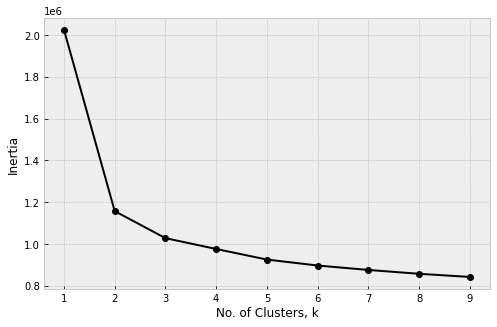

In [29]:
# Optimal k value
k_val = range(1, 10)
inert = []

for k in k_val:
    model = KMeans(n_clusters=k)
    model.fit(data)
    inert.append(model.inertia_)
    
plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(k_val, inert, '-o', color="black")
plt.xlabel('No. of Clusters, k')
plt.ylabel('Inertia')
plt.xticks(k_val)
plt.show() 
# 2 clusters: best value for k.

In [38]:
def k_means(n_clust, df, true_labels):
    k_means = KMeans(n_clusters = n_clust, random_state=42, n_init=30)
    k_means.fit(df)
    c_labels = k_means.labels_
    new_df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
    crosstab = pd.crosstab(new_df['clust_label'], new_df['orig_label'])
    y_cluster = k_means.predict(df)
    display(crosstab)
    
    print('% 9s' % 'inertia  homo    compl   v-meas   ARI     AMI     silhouette')
    print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
      %(k_means.inertia_,
      homogeneity_score(true_labels, y_cluster),
      completeness_score(true_labels, y_cluster),
      v_measure_score(true_labels, y_cluster),
      adjusted_rand_score(true_labels, y_cluster),
      adjusted_mutual_info_score(true_labels, y_cluster),
      silhouette_score(df, y_cluster, metric='euclidean')))

In [39]:
k_means(n_clust=2, df=data, true_labels=labels)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,680,622,668,0,0,6
1,1,1,0,603,493,535


inertia  homo    compl   v-meas   ARI     AMI     silhouette
1156484   0.378   0.981   0.546   0.329   0.546    0.390


In [40]:
k_means(n_clust=6, df=data, true_labels=labels)
# original 6

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,1,0,0,329,107,438
1,554,23,0,0,0,0
2,106,157,190,0,0,2
3,20,443,478,0,0,0
4,0,0,0,248,311,97
5,0,0,0,26,75,4


inertia  homo    compl   v-meas   ARI     AMI     silhouette
895967   0.547   0.588   0.567   0.429   0.566    0.112


In [42]:
# 0 = stationary , 1 = moving
# convert to binary

labels_binary = labels.copy()
for i in range(len(labels_binary)):
    if (labels_binary[i] == 'STANDING' or labels_binary[i] == 'SITTING' or labels_binary[i] == 'LAYING'):
        labels_binary[i] = 0
        
    else:
        labels_binary[i] = 1
        
labels_binary = np.array(labels_binary.astype(int))

In [43]:
k_means(n_clust=2, df=data, true_labels=labels_binary)

orig_label,0,1
clust_label,,
0,1970,6
1,2,1631


inertia  homo    compl   v-meas   ARI     AMI     silhouette
1156484   0.977   0.978   0.978   0.991   0.978    0.390


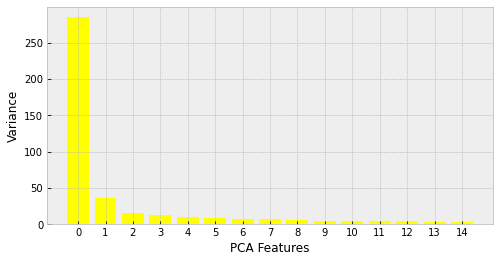

In [44]:
# 2 cluster is good for finding moving and non-moving labels
# Dimension reduction (PCA) testing

# optimal no. of features
pca = PCA(random_state = 42)
pca.fit(data)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='yellow')
plt.xlabel('PCA Features')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()
# best fit = 1 feature

In [45]:
def pca_transform(n_comp):
    pca = PCA(n_components=n_comp, random_state=42)
    global data_reduced
    data_reduced = pca.fit_transform(data)
    print('new data shape: ' + str(data_reduced.shape))

In [48]:
pca_transform(n_comp=1)
k_means(n_clust=2, df=data_reduced, true_labels=labels_binary)

new data shape: (3609, 1)


orig_label,0,1
clust_label,,
0,1971,8
1,1,1629


inertia  homo    compl   v-meas   ARI     AMI     silhouette
168716   0.976   0.976   0.976   0.990   0.976    0.794


In [47]:
pca_transform(n_comp=2)
k_means(n_clust=2, df=data_reduced, true_labels=labels_binary)

new data shape: (3609, 2)


orig_label,0,1
clust_label,,
0,1969,6
1,3,1631


inertia  homo    compl   v-meas   ARI     AMI     silhouette
295753   0.975   0.975   0.975   0.990   0.975    0.694


In [ ]:
# inertia improved